In [1]:
import boto3
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Define S3 paths
bucket_name = "mydataset-710"
model_key = "models/Random Forest.pkl"
file_key = "resampled_data.csv"

# Initialize S3 client
s3_client = boto3.client("s3")

# Download best model from S3
model_filename = "/tmp/Best_Model.pkl"
s3_client.download_file(bucket_name, model_key, model_filename)
best_model = joblib.load(model_filename)

print("Best model loaded successfully from S3!")

Matplotlib is building the font cache; this may take a moment.


Best model loaded successfully from S3!


In [2]:
# Load dataset from S3
import boto3
import pandas as pd
obj = s3_client.get_object(Bucket=bucket_name, Key=file_key)
df = pd.read_csv(obj["Body"])

# Prepare data
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Make predictions
y_pred = best_model.predict(X)
y_probs = best_model.predict_proba(X)[:, 1]  

print("Predictions made successfully!")

Predictions made successfully!


In [3]:
# Classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6354407
           1       1.00      1.00      1.00   6354407

    accuracy                           1.00  12708814
   macro avg       1.00      1.00      1.00  12708814
weighted avg       1.00      1.00      1.00  12708814



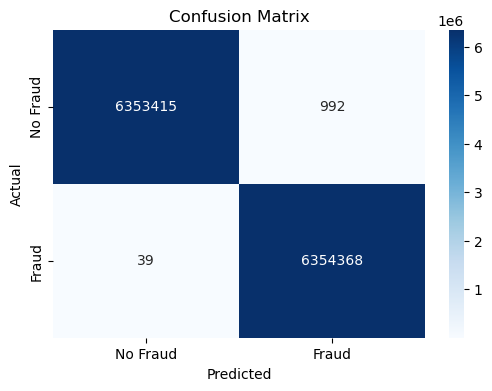

In [4]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

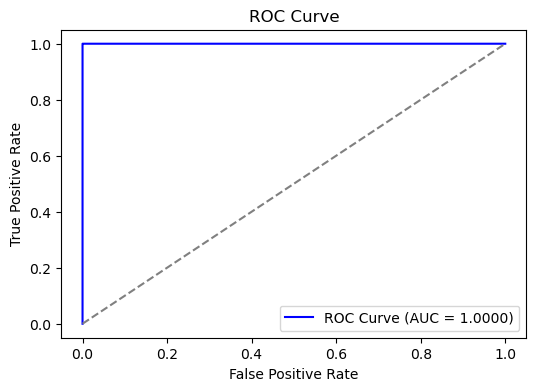

In [5]:
# ROC Curve
fpr, tpr, _ = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

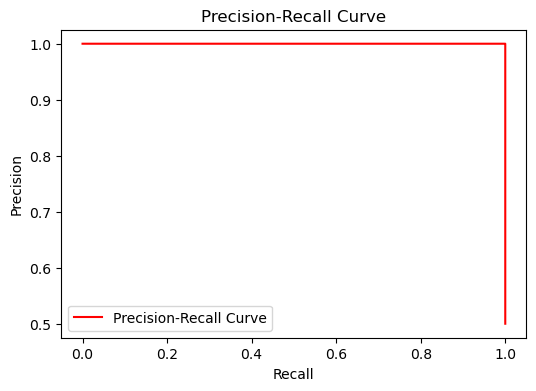

In [6]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='red', label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

/tmp/ipykernel_16903/2510725131.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


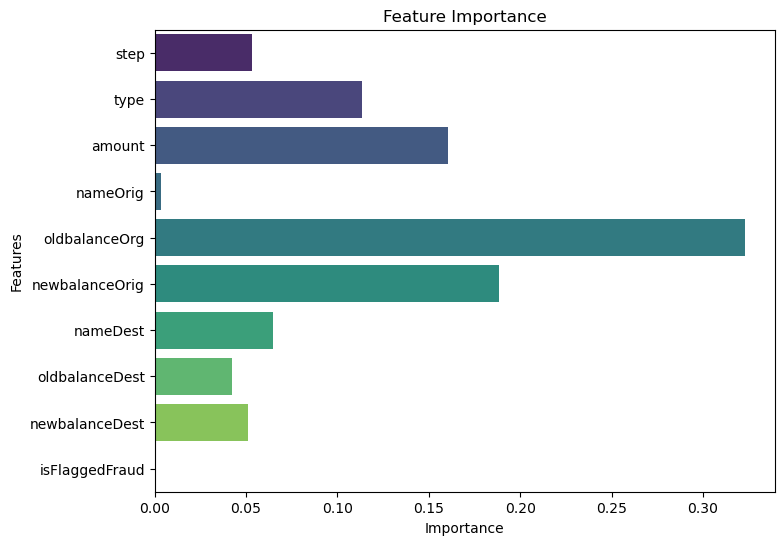

In [7]:
# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = X.columns
    
    plt.figure(figsize=(8,6))
    sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance")
    plt.show()